<a href="https://colab.research.google.com/github/solomonpromise/solo/blob/master/Project_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Project Work on Detecting Fake Twitter News

### Importing Libraries 

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.utils import shuffle, resample

### Inspectining the Data Set

In [ ]:
#loading in my first dataset that contains true news.
df_true = pd.read_csv("True.csv")

In [ ]:
#hchecking the head of my dataset
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
#checking the shape of the dataset
df_true.shape

(21417, 4)

In [ ]:
#checking the info to confirm if there are null values.
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
#loading the secovd dataset that contains the false news
df_fake = pd.read_csv("Fake.csv")

In [ ]:
#checking the head of the fake news dataset
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
#checking the shape of the fake news data set
df_fake.shape

(23481, 4)

In [ ]:
#checking the info to confirm if there are null values.
df_fake.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
df_fake.isna().sum()
#no missing values

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
#Introducing a new column to the two that sets
df_true["True/Fake"] = "True"
df_fake["True/Fake"] = "Fake"

#the data sets did not contain any column for the target variables, hence the need to introduce the new column.

In [ ]:
#checking to affirm that the new column "True/Fake" has been added.
df_true.head()

,title,text,subject,date,True/Fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [ ]:
#checking to affirm that the new column "True/Fake" has been added.
df_fake.tail()

,title,text,subject,date,True/Fake
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",Fake


In [ ]:
#concating both datasets (df_true) & ("df_fake") to get a single dataset
df_news = pd.concat([df_true, df_fake])

In [ ]:
#checking the head of the news dataset that contains the now contains the two previous datasets "df_true" & "df_fake"
df_news.head()

,title,text,subject,date,True/Fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [ ]:
#shuffling the "df_news" dataset to ensure that we don't have Fake/True lined up together.
df_news = shuffle(df_news)
df_news.head()

,title,text,subject,date,True/Fake
22010,Message for Progressive Left: ‘If You Want to ...,"Ever since last month, the US media and the le...",US_News,"September 5, 2017",Fake
1428,It’s Happening: Justice Department Appoints S...,After the nation joined together and demanded ...,News,"May 17, 2017",Fake
7054,Sander’s Campaign Manager Literally Stole An ...,In what seems to be another misspeak moment fo...,News,"April 6, 2016",Fake
8579,White High-Schoolers Break The Internet With ...,A group of seniors from Desert Vista High Scho...,News,"January 23, 2016",Fake
20712,WATCH: LITTLE HOUSE ON PRAIRIE ACTRESS Runs Fo...,America has proven time and time again that li...,left-news,"Apr 19, 2016",Fake


In [ ]:
#droping the "date" column, it's not relevant to our prediction
df_news.drop("date", inplace = True, axis = 1)

In [ ]:
#checking to affirm the drop
df_news.head()

,title,text,subject,True/Fake
22010,Message for Progressive Left: ‘If You Want to ...,"Ever since last month, the US media and the le...",US_News,Fake
1428,It’s Happening: Justice Department Appoints S...,After the nation joined together and demanded ...,News,Fake
7054,Sander’s Campaign Manager Literally Stole An ...,In what seems to be another misspeak moment fo...,News,Fake
8579,White High-Schoolers Break The Internet With ...,A group of seniors from Desert Vista High Scho...,News,Fake
20712,WATCH: LITTLE HOUSE ON PRAIRIE ACTRESS Runs Fo...,America has proven time and time again that li...,left-news,Fake


In [ ]:
#adding a new column called "article". This column is a combination of columns "title" and "text"
df_news["articles"] = df_news.title + df_news.text
df_news.head()

,title,text,subject,True/Fake,articles
22010,Message for Progressive Left: ‘If You Want to ...,"Ever since last month, the US media and the le...",US_News,Fake,Message for Progressive Left: ‘If You Want to ...
1428,It’s Happening: Justice Department Appoints S...,After the nation joined together and demanded ...,News,Fake,It’s Happening: Justice Department Appoints S...
7054,Sander’s Campaign Manager Literally Stole An ...,In what seems to be another misspeak moment fo...,News,Fake,Sander’s Campaign Manager Literally Stole An ...
8579,White High-Schoolers Break The Internet With ...,A group of seniors from Desert Vista High Scho...,News,Fake,White High-Schoolers Break The Internet With ...
20712,WATCH: LITTLE HOUSE ON PRAIRIE ACTRESS Runs Fo...,America has proven time and time again that li...,left-news,Fake,WATCH: LITTLE HOUSE ON PRAIRIE ACTRESS Runs Fo...


In [ ]:
#reordering columns
df_news[["title", "text", "subject", "articles", "True/Fake"]]

,title,text,subject,articles,True/Fake
22010,Message for Progressive Left: ‘If You Want to ...,"Ever since last month, the US media and the le...",US_News,Message for Progressive Left: ‘If You Want to ...,Fake
1428,It’s Happening: Justice Department Appoints S...,After the nation joined together and demanded ...,News,It’s Happening: Justice Department Appoints S...,Fake
7054,Sander’s Campaign Manager Literally Stole An ...,In what seems to be another misspeak moment fo...,News,Sander’s Campaign Manager Literally Stole An ...,Fake
8579,White High-Schoolers Break The Internet With ...,A group of seniors from Desert Vista High Scho...,News,White High-Schoolers Break The Internet With ...,Fake
20712,WATCH: LITTLE HOUSE ON PRAIRIE ACTRESS Runs Fo...,America has proven time and time again that li...,left-news,WATCH: LITTLE HOUSE ON PRAIRIE ACTRESS Runs Fo...,Fake
...,...,...,...,...,...
12805,Saudi-backed fighters capture coastal area in ...,DUBAI (Reuters) - A Western-backed Saudi-led c...,worldnews,Saudi-backed fighters capture coastal area in ...,True
19100,Police investigating militants search Brussels...,BRUSSELS (Reuters) - Police searched eight hou...,worldnews,Police investigating militants search Brussels...,True
19035,Mattis says no tolerance for terrorist sanctua...,NEW DELHI (Reuters) - U.S. Defense Secretary J...,worldnews,Mattis says no tolerance for terrorist sanctua...,True
5866,Trump's heartland voters shrug off global upro...,(This version of the Jan 29 story has been co...,politicsNews,Trump's heartland voters shrug off global upro...,True


In [ ]:
df_news.isna().sum()
#no missing values

title        0
text         0
subject      0
True/Fake    0
articles     0
dtype: int64

In [ ]:
#checking to confirm of the datatypes are correct
df_news.dtypes

title        object
text         object
subject      object
True/Fake    object
articles     object
dtype: object

### Balancing samples

In [1]:
#checking value_counts to check if the dataset is balanced
df_news["True/Fake"].value_counts()

#the result of this check shows the data is not balanced, hence the need to balance it.

NameError: ignored

In [ ]:
#Upsampling the minority class to have a balanced dataset
df_majority = df_news[df_news["True/Fake"] == "Fake"]
df_minority = df_news[df_news["True/Fake"] == "True"]

In [ ]:
#Using the resampling function to balance the dataset
df_minority_upsampled = resample(df_minority,
                                replace = True,
                                n_samples = 23481,
                                random_state = 12)

df_news = pd.concat([df_majority, df_minority_upsampled])

In [ ]:
#Checking to affirm that the dataset has been balanced.
df_news["True/Fake"].value_counts()

In [ ]:
#checking to ensure that there are no null values.
df_news.isna().sum()

### Data Preprocessing
#### Importing libraries for preprocesting task

In [ ]:
from nltk.corpus import stopwords 
import string
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [ ]:
#defining a function for preprocessing the dataset
def Processed_text(s):
    
    stop_words = set(stopwords.words ("english"))
    
    punctuation = '''...!@#$%^&*(){}[]|._-`/?:;"'\,~12345678876543******'''
    
    lemmatizer = WordNetLemmatizer()

    processed_text = word_tokenize(s)
    processed_text = [w.lower() for w in processed_text]
    
    word_counts = Counter(processed_text)
    uncommon_words = word_counts.most_common()[:-10:-1]
    
    processed_text = [w for w in processed_text if w not in stop_words]
    processed_text = [w for w in processed_text if w not in punctuation]

    
    processed_text = [w for w in processed_text if w not in uncommon_words]
    processed_text = [lemmatizer.lemmatize(w) for w in processed_text]
    
    return processed_text
   

In [ ]:
#appling the function on the "articles" column, and adding a new column "clean_text" to the dataset.
#The "clean_text" column is the preprocessed/cleaned column
df_news["clean_text"] = df_news["articles"].apply(Processed_text)

In [ ]:
#checking to affirm that the text has been cleaned.
df_news["clean_text"].sample(10)

20201    [bill, clinton, lost, watch, yank, balloon, li...
6312     [obama, say, u.n., vote, n't, rupture, u.s.-is...
564      [trump, crushed, ex-kkk, leader, bash, finally...
6250     [u.s., trust, russia, trump, nominee, envoy, u...
856      [trump, abuse, power, punishes, qatar, refusin...
19831    [tillerson, say, u.s., weighing, closing, emba...
647      [key, trump, supporter, major, donor, trump, ‘...
7567     [popular, st., louis, bar, closed, clientele, ...
10707    [senator, say, republican, consensus, vote, ob...
14596    [check, new, ben, jerry, ’, flavor, touting, a...
Name: clean_text, dtype: object

In [ ]:
#checking the head of the dataset after carring out preprocessing
df_news.head()

,title,text,subject,True/Fake,articles,clean_text
22010,Message for Progressive Left: ‘If You Want to ...,"Ever since last month, the US media and the le...",US_News,Fake,Message for Progressive Left: ‘If You Want to ...,"[message, progressive, left, ‘, want, see, rea..."
1428,It’s Happening: Justice Department Appoints S...,After the nation joined together and demanded ...,News,Fake,It’s Happening: Justice Department Appoints S...,"[’, happening, justice, department, appoints, ..."
7054,Sander’s Campaign Manager Literally Stole An ...,In what seems to be another misspeak moment fo...,News,Fake,Sander’s Campaign Manager Literally Stole An ...,"[sander, ’, campaign, manager, literally, stol..."
8579,White High-Schoolers Break The Internet With ...,A group of seniors from Desert Vista High Scho...,News,Fake,White High-Schoolers Break The Internet With ...,"[white, high-schoolers, break, internet, truly..."
20712,WATCH: LITTLE HOUSE ON PRAIRIE ACTRESS Runs Fo...,America has proven time and time again that li...,left-news,Fake,WATCH: LITTLE HOUSE ON PRAIRIE ACTRESS Runs Fo...,"[watch, little, house, prairie, actress, run, ..."


In [ ]:
#checking the shape of the dataset after preprocessing
df_news.shape

(46962, 6)

### Feature Engineering on the dataset 

#### Importing Libraries for feature engineering 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

#### Designating the target and feature variables

In [ ]:
#designating y as the target variable
y = df_news["True/Fake"]

In [ ]:
#designating x as the feature variables. The column "clean_text" was the only column selected as feature variaabl, 
#since it is the column preprocessing was carried out on.
x = df_news["clean_text"]

In [ ]:
#slipiting the dataset into test and train
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.25, random_state = 12, stratify = y)

In [ ]:
#checking out the train_y
train_y

15612    True
21179    Fake
10655    Fake
1351     True
12772    Fake
         ... 
899      Fake
13230    Fake
3240     True
10396    Fake
15852    True
Name: True/Fake, Length: 35221, dtype: object

In [ ]:
#checking out the train_x dataset
train_x

15612    [australian, pm, force, lawmaker, declare, cit...
21179    [fbi, post, 5,000, reward, person, committed, ...
10655    [“, baloney, ”, cnn, anchor, slammed, weather,...
1351     [turkey, summons, u.s., consulate, worker, que...
12772    [breaking, wikileaks, hillary, admits, u.s., ’...
                               ...                        
899      [top, intel, dem, rip, trump, kissing, putin, ...
13230    [time, house, republican, move, charge, hillar...
3240     [trump, host, south, korea, president, june, 2...
10396    [mn, somali, man, rape, college, student…gets,...
15852    [g5, sahel, launch, military, operation, afric...
Name: clean_text, Length: 35221, dtype: object

In [ ]:
#checking out the test_y dataset
test_y

19697    Fake
3289     True
6623     Fake
2323     True
11566    True
         ... 
5722     True
21038    Fake
7849     True
462      Fake
9496     True
Name: True/Fake, Length: 11741, dtype: object

In [ ]:
#checking out the test_x dataset
test_x

19697    [breaking, email, leak, “, bernie, need, groun...
3289     [wilbur, ross, seen, imposing, mexico, sugar, ...
6623     [president, obama, senate, gop, seriously, guy...
2323     [russia, penny, balkan, comment, expose, washi...
11566    [japan, approves, record, defense, spending, f...
                               ...                        
5722     [highlight, trump, presidency, february, 6:15,...
21038    [europe, crash, burn, eu, official, finally, a...
7849     [trump, president, would, pose, global, danger...
462      [guy, donald, trump, called, ‘, african-americ...
9496     [trump, north, korea, wall, street, regulation...
Name: clean_text, Length: 11741, dtype: object

In [ ]:
#defining a function that will convert our train and test variables (train_x and test_x) 
#to pandas.core.series.Series to allow us carry out the feature engineering on the text.
def lis(ls):
    return ' '.join(ls)

In [ ]:
#appling the "lis" function on train_x
train_x.apply(lis)

15612    australian pm force lawmaker declare citizensh...
21179    fbi post 5,000 reward person committed “ hate ...
10655    “ baloney ” cnn anchor slammed weather channel...
1351     turkey summons u.s. consulate worker questioni...
12772    breaking wikileaks hillary admits u.s. ’ possi...
                               ...                        
899      top intel dem rip trump kissing putin ’ a**s ‘...
13230    time house republican move charge hillary perj...
3240     trump host south korea president june 29-30 wh...
10396    mn somali man rape college student…gets 90-day...
15852    g5 sahel launch military operation african scr...
Name: clean_text, Length: 35221, dtype: object

In [ ]:
#putting train_x after appling the function above still in train_x variable name.
train_x = train_x.apply(lis)

In [ ]:
#affirmig the datatype of the train_x
type(train_x)

pandas.core.series.Series

In [ ]:
#appling the "lis" function on test_x
test_x.apply(lis)

19697    breaking email leak “ bernie need ground pulp…...
3289     wilbur ross seen imposing mexico sugar deal in...
6623     president obama senate gop seriously guy f*cki...
2323     russia penny balkan comment expose washington ...
11566    japan approves record defense spending favor u...
                               ...                        
5722     highlight trump presidency february 6:15 p.m. ...
21038    europe crash burn eu official finally admit se...
7849     trump president would pose global danger u.n. ...
462      guy donald trump called ‘ african-american ’ t...
9496     trump north korea wall street regulation tech ...
Name: clean_text, Length: 11741, dtype: object

In [ ]:
#putting train_x after appling the function above still in test_x variable name
test_x = test_x.apply(lis)

In [ ]:
#affirmig the datatype of the test_x
type(test_x)

pandas.core.series.Series

In [ ]:
#applying vectorizer
#appling the CountVectorizer

vect_1 = CountVectorizer(analyzer = Processed_text)

In [ ]:
#training the algorithm with the dataset (train_x) using the CountVectorizer
vect_1.fit(train_x)

CountVectorizer(analyzer=<function Processed_text at 0x000000A1B3675678>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
#transforming the datasets "train_x" & "test_x" to numbers using CountVectorizer
train_x_cnt = vect_1.transform(train_x)
test_x_cnt = vect_1.transform(test_x)

#the shape of the train_x & test_x after converting the datasets to numbers using CountfVectorizer
print(train_x_cnt.shape, test_x_cnt.shape)

(35221, 195163) (11741, 195163)


In [ ]:
#printing the train_x dataset after the tranformation/conversion to affirm the conversion
print(train_x_cnt)

  (0, 11691)	1
  (0, 12053)	1
  (0, 18553)	1
  (0, 20207)	1
  (0, 20244)	1
  (0, 22865)	1
  (0, 23190)	1
  (0, 23243)	1
  (0, 24752)	1
  (0, 25666)	1
  (0, 26187)	1
  (0, 28675)	2
  (0, 28780)	1
  (0, 28786)	3
  (0, 30793)	1
  (0, 30964)	1
  (0, 34030)	1
  (0, 35904)	2
  (0, 39197)	1
  (0, 39824)	1
  (0, 40918)	1
  (0, 41838)	1
  (0, 42370)	3
  (0, 42961)	1
  (0, 44518)	3
  :	:
  (35220, 158853)	1
  (35220, 159722)	1
  (35220, 160859)	2
  (35220, 162830)	2
  (35220, 165418)	2
  (35220, 165421)	1
  (35220, 165672)	2
  (35220, 168840)	1
  (35220, 169111)	1
  (35220, 169588)	1
  (35220, 174457)	1
  (35220, 174685)	1
  (35220, 177010)	1
  (35220, 177142)	1
  (35220, 177958)	2
  (35220, 180498)	1
  (35220, 180547)	1
  (35220, 181800)	1
  (35220, 182244)	3
  (35220, 182632)	1
  (35220, 187740)	1
  (35220, 188651)	1
  (35220, 189987)	2
  (35220, 191515)	1
  (35220, 192056)	1


In [ ]:
#appling the TFIDF Vectorizer
vect_2 = TfidfVectorizer(analyzer = Processed_text)

#training the algorithm with the dataset (train_x) using the Tfidf Vectorizer
vect_2.fit(train_x)

TfidfVectorizer(analyzer=<function Processed_text at 0x000000A1B3675678>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
#transforming the datasets "train_x" & "test_x" to numbers using TfidfVectorizer
train_x_tfidf = vect_2.transform(train_x)
test_x_tfidf = vect_2.transform(test_x)

#the shape of the train_x & test_x after converting the datasets to numbers using TfidfVectorizer
print(train_x_tfidf.shape, test_x_tfidf.shape)

(35221, 195163) (11741, 195163)


In [ ]:
#printing the train_x dataset after the tranformation/conversion to affirm the conversion
print(train_x_tfidf)

  (0, 193568)	0.03132671195769243
  (0, 193067)	0.018758762308543092
  (0, 192056)	0.09660301883180668
  (0, 188651)	0.02265029408114429
  (0, 182391)	0.050209093028457996
  (0, 181300)	0.05922821000473552
  (0, 180203)	0.02174095360463054
  (0, 179544)	0.04765016425845654
  (0, 179536)	0.40899276746370156
  (0, 176069)	0.02003095513188656
  (0, 175015)	0.0392981021683475
  (0, 174623)	0.052679224763448454
  (0, 174457)	0.028393513275230587
  (0, 169520)	0.0753380200430926
  (0, 168840)	0.025095433936396083
  (0, 168272)	0.041123206895021545
  (0, 167345)	0.057253371135472395
  (0, 166093)	0.04278761965313085
  (0, 164693)	0.06942066432328153
  (0, 164350)	0.05046895583249876
  (0, 161180)	0.036792764353834134
  (0, 161172)	0.09345290157509267
  (0, 160859)	0.023633285825628472
  (0, 160752)	0.03931721269648306
  (0, 158336)	0.03997294348629357
  :	:
  (35220, 33314)	0.08264382609112551
  (35220, 32122)	0.04804858148827754
  (35220, 31750)	0.04496804570846287
  (35220, 31376)	0.0666417

### Modeling and Evaluation

#### Importing Libraries

In [ ]:
from sklearn import metrics

from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns

In [ ]:
#create an instance of the estimator
nb = MultinomialNB()

### Modelling 

In [ ]:
#use the training data to train the estimator

#for train and test data from CounterVectorizer
nb.fit(train_x_cnt, train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#for train and test data from TfidfVectorizer
nb.fit(train_x_tfidf, train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Evaluating the models

In [ ]:
#evaluating the performance of the model
y_pred_test_cnt = nb.predict(test_x_cnt)
y_pred_test_tfidf = nb.predict(test_x_tfidf)

In [ ]:
#calculating the accuracy of models
y_pred_cnt_acc = metrics.accuracy_score(y_pred = y_pred_test_cnt, y_true = test_y)
y_pred_tfidf_acc = metrics.accuracy_score(y_pred = y_pred_test_tfidf, y_true = test_y)

In [ ]:
#calculating the precision of the models
y_pred_cnt_prec = metrics.precision_score(y_pred = y_pred_test_cnt, y_true = test_y, pos_label = "Fake")
y_pred_tfidf_prec = metrics.precision_score(y_pred = y_pred_test_tfidf, y_true = test_y, pos_label = "Fake")

In [ ]:
#confusion matrix
cm_cnt = metrics.confusion_matrix(y_pred = y_pred_test_cnt, y_true = test_y)
cm_tfidf = metrics.confusion_matrix(y_pred = y_pred_test_tfidf, y_true = test_y)

In [ ]:
#Precision and Accuracy for cnt
print("Precision for cnt: {:0.2f}%".format (100*y_pred_cnt_prec))
print("Accuracy for cnt: {:0.2f}%".format (100*y_pred_cnt_acc))

Precision for cnt: 99.20%
Accuracy for cnt: 95.14%


In [ ]:
#Precision and Accuracy for tfidf
print("Precision for tfidf: {:0.2f}%".format (100*y_pred_tfidf_prec))
print("Accuracy for tfidf: {:0.2f}%".format (100*y_pred_tfidf_acc))

Precision for tfidf: 97.19%
Accuracy for tfidf: 95.24%


In [ ]:
#Confusion matrix for cnt
print("Confusion Matrix for cnt:\n",cm_cnt)

Confusion Matrix for cnt:
 [[5342  528]
 [  43 5828]]


In [ ]:
#Confusion matrix for tfidf
print("Confusion Matrix for tfidf:\n",cm_tfidf)

Confusion Matrix for tfidf:
 [[5469  401]
 [ 158 5713]]


In [ ]:
#printing the classification_report for tfidf
report_tfidf = classification_report(y_pred = y_pred_test_tfidf, y_true = test_y)
print(report_tfidf)

              precision    recall  f1-score   support

        Fake       0.97      0.93      0.95      5870
        True       0.93      0.97      0.95      5871

    accuracy                           0.95     11741
   macro avg       0.95      0.95      0.95     11741
weighted avg       0.95      0.95      0.95     11741



In [ ]:
#printing the classification_report for cnt
report_cnt = classification_report(y_pred = y_pred_test_cnt, y_true = test_y)
print(report_cnt)

              precision    recall  f1-score   support

        Fake       0.99      0.91      0.95      5870
        True       0.92      0.99      0.95      5871

    accuracy                           0.95     11741
   macro avg       0.95      0.95      0.95     11741
weighted avg       0.95      0.95      0.95     11741



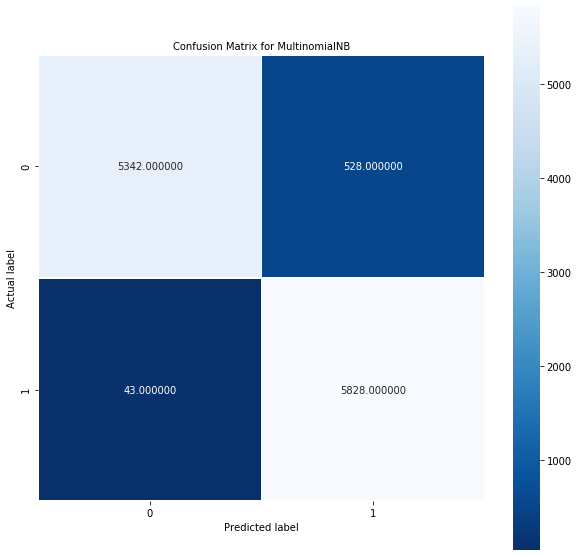

In [ ]:
#ploting a graph for the confusion matrix of cnt values
cm_cnt = metrics.confusion_matrix(y_pred = y_pred_test_cnt, y_true = test_y)

plt.show()
plt.figure(figsize=(10,10))
sns.heatmap(cm_cnt, annot=True, linewidth=.5, square = True, cmap = 'Blues_r',fmt='f');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix for MultinomialNB', size = 10);


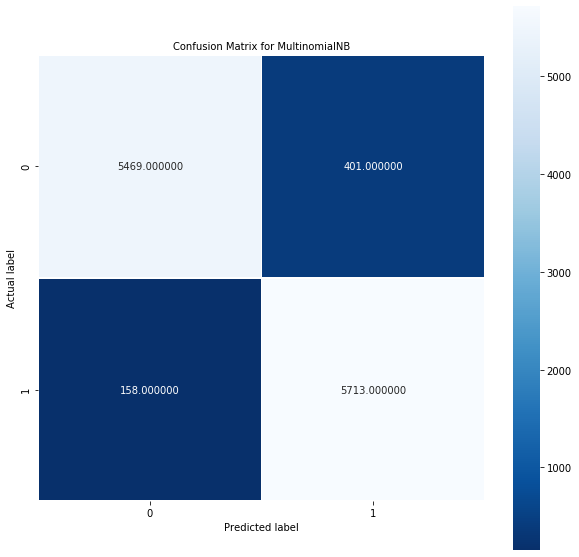

In [ ]:
#ploting a graph for the confusion matrix of cnt values
m_tfidf = metrics.confusion_matrix(y_pred = y_pred_test_tfidf, y_true = test_y)

plt.show()
plt.figure(figsize=(10,10))
sns.heatmap(cm_tfidf, annot=True, linewidth=.5, square = True, cmap = 'Blues_r',fmt='f');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix for MultinomialNB', size = 10);


### Merging the Predicted Valeues (y_pred) of Y and the Actual Values(test_y) of Y.

In [ ]:
#calling our test_y dataset
test_y

19697    Fake
3289     True
6623     Fake
2323     True
11566    True
         ... 
5722     True
21038    Fake
7849     True
462      Fake
9496     True
Name: True/Fake, Length: 11741, dtype: object

In [ ]:
#Checking the shape to affirm if it will be equal with the dataset it will be merged with.
test_y.shape

(11741,)

In [ ]:
#Checking the type of the dataset to know if our what task to do on it inorder for us to merge
type(test_y)

pandas.core.series.Series

In [ ]:
#calling out the y_pred_test_cnt dataset.
y_pred_test_cnt

array(['Fake', 'True', 'Fake', ..., 'True', 'Fake', 'True'], dtype='<U4')

In [ ]:
#calling out the y_pred_test_tfidf dataset.
y_pred_test_tfidf

array(['Fake', 'True', 'Fake', ..., 'True', 'Fake', 'True'], dtype='<U4')

In [ ]:
#Checking the type of the dataset to know if our what task to do on it inorder for us to merge
type(y_pred_test_cnt)

numpy.ndarray

In [ ]:
#Checking the type of the dataset to know if our what task to do on it inorder for us to merge
y_pred_test_tfidf

array(['Fake', 'True', 'Fake', ..., 'True', 'Fake', 'True'], dtype='<U4')

In [ ]:
#Converting the two data sets to pandas dataframe type to allow us merge them, and merging them together.
#for the predicted y values from CountVectorizer. 
cnt = pd.DataFrame({"Predicted_cnt":y_pred_test_cnt,"Actual":test_y})
cnt

,Predicted_cnt,Actual
19697,Fake,Fake
3289,True,True
6623,Fake,Fake
2323,True,True
11566,True,True
...,...,...
5722,True,True
21038,Fake,Fake
7849,True,True
462,Fake,Fake


In [ ]:
#exporting the merged dataset 
cnt.to_csv("COMPARED VALUES OF PREDICTED Y AND TEST Y_CNT.csv", encoding = "utf8")

In [ ]:
#Converting the two data sets to pandas dataframe type to allow us merge them, and merging them together.
#for the predicted y values from TfidfVectorizer. 
tfidf = pd.DataFrame({"Predicted_tfidf":y_pred_test_tfidf,"Actual":test_y})
tfidf

,Predicted_tfidf,Actual
19697,Fake,Fake
3289,True,True
6623,Fake,Fake
2323,True,True
11566,True,True
...,...,...
5722,True,True
21038,Fake,Fake
7849,True,True
462,Fake,Fake


In [ ]:
#exporting the merged dataset 
tfidf.to_csv("COMPARED VALUES OF PREDICTED Y AND TEST Y_TFIDF.csv", encoding = "utf8")

#                                            THE END 